In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
# Step 3: Adding a convolutional layer + MaxPool

model = keras.Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(units=512,
                      activation='relu'))

model.add(layers.Dense(units=384,
                      activation='relu'))

model.add(layers.Dense(10,activation='softmax'))
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5499 - accuracy: 0.4439 - val_loss: 1.3269 - val_accuracy: 0.5223
Epoch 2/100
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2330 - accuracy: 0.5622 - val_loss: 1.1855 - val_accuracy: 0.5810
Epoch 3/100
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1055 - accuracy: 0.6131 - val_loss: 1.1094 - val_accuracy: 0.6138
Epoch 4/100
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0042 - accuracy: 0.6484 - val_loss: 1.0492 - val_accuracy: 0.6360
Epoch 5/100
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9221 - accuracy: 0.6777 - val_loss: 1.0069 - val_accuracy: 0.6481
Epoch 6/100
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8436 - accuracy: 0.7049 - val_loss: 0.9989 - val_accuracy: 0.6582
Epoch 7/100
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7712 - accuracy: 0.7333 - val_loss: 0

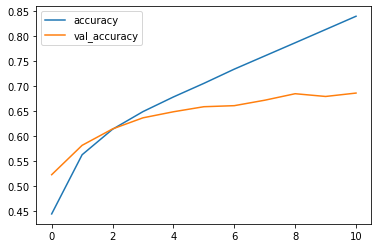

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

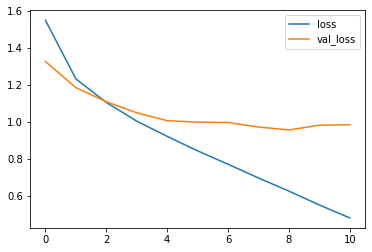

In [ ]:
losses[['loss','val_loss']].plot()